**Objective:** 
The objective of this project is to teach students how to apply clustering to real datasets.

You should be able to answer the following questions and provide reasonable justification for your answers: 
* Which clustering approach have you decided to use on each dataset? 
* Compare between Kmeans, Hierarchal and DBScan.
* Discuss how you tuned your clustering hyperparameters to achieve the best cluster assignment?
* What is the effect of different distance functions on the calculated clusters?
* How did you evaluate the performance of different clustering techniques on different datatsets?
* Visualize your output where applicable.
* What is the effect of scaling on the performance of clustering techniques? 

 
 



Running this project requires the following imports:

In [3]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.preprocessing as prep
from sklearn.datasets import make_blobs
from plotnine import *   
# StandardScaler is a function to normalize the data 
# You may also check MinMaxScaler and MaxAbsScaler 
#from sklearn.preprocessing import StandardScaler

from sklearn.cluster import DBSCAN


from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score

%matplotlib inline
# Please refer to the sklearn documentation to learn more about the different parameters for each clustering technique.

In [5]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = 'brgcmyk'  #List colors
    alpha = 0.5  
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],c = color[i], marker = 'x', s = 100)

## Multi Blob Data Set 
* The dataset generated below is known to be best clustered into 6 clusters.
* Cluster the data set below using the three different clustering techniques discussed in the course.
* Visualize your clustering output in each step of your work.



In [7]:
#Data Generation and Visualization
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")

n_bins = 6  
centers = [(-3, -3), (0, 0), (5,2.5),(-1, 4), (4, 6), (9,7)]
Multi_blob_Data, y = make_blobs(n_samples=[100,150, 300, 400,300, 200], n_features=2, cluster_std=[1.3,0.6, 1.2, 1.7,0.9,1.7],
                  centers=centers, shuffle=False, random_state=42)
display_cluster(Multi_blob_Data)

### Kmeans 
* Use Kmeans with different values of K to cluster the above data. 
* Display the outcome of each value of K. 
* Plot distortion function versus K and choose the approriate value of K. 
* Plot the silhouette_score versus K and use it to choose the best K. 
* Store the silhouette_score for the best K for later comparison with other clustering techniques. 
* Comment on the effect of centroid initialization on cluster assignment. 
* Hint: Lookup k-means++ .

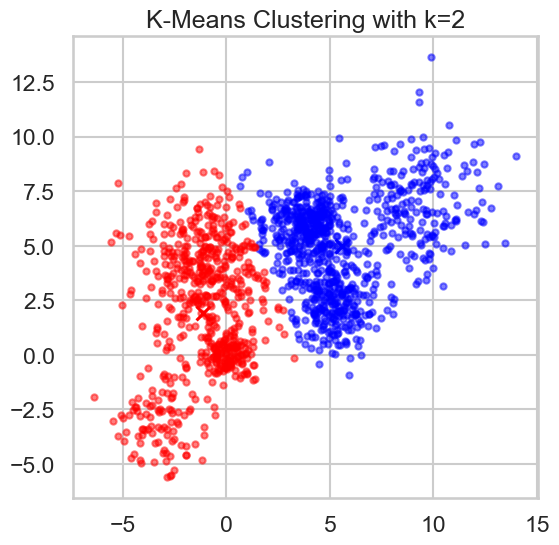

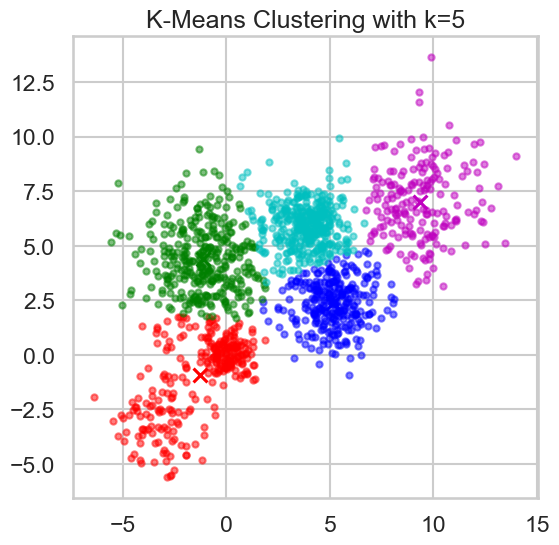

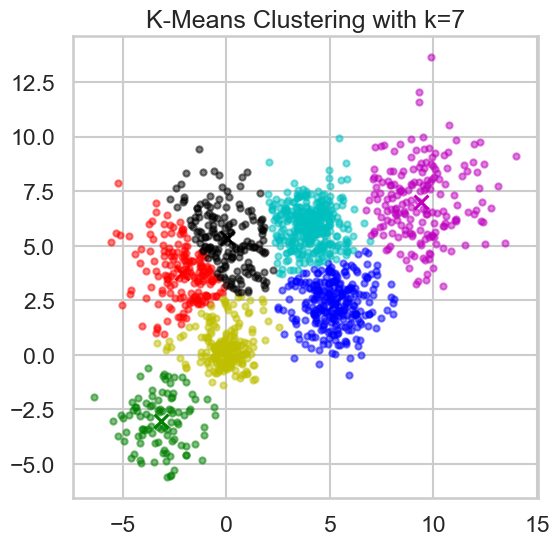

IndexError: string index out of range

In [9]:
# Apply K-Means clustering with different K values 
K = range(2, 11)  # We start from 2 because K=1 is trivial
inertia = []  # Store inertia values
silhouette_scores = []  # Store silhouette scores

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10, init='k-means++')
    kmeans.fit(Multi_blob_Data)
    
    inertia.append(kmeans.inertia_)  # Store inertia
    silhouette_scores.append(silhouette_score(Multi_blob_Data, kmeans.labels_))  # Store silhouette scores
    
    # Display clustering result
    plt.figure(figsize=(6, 6))
    display_cluster(Multi_blob_Data, km=kmeans, num_clusters=k)
    plt.title(f"K-Means Clustering with k={k}")
    plt.show()


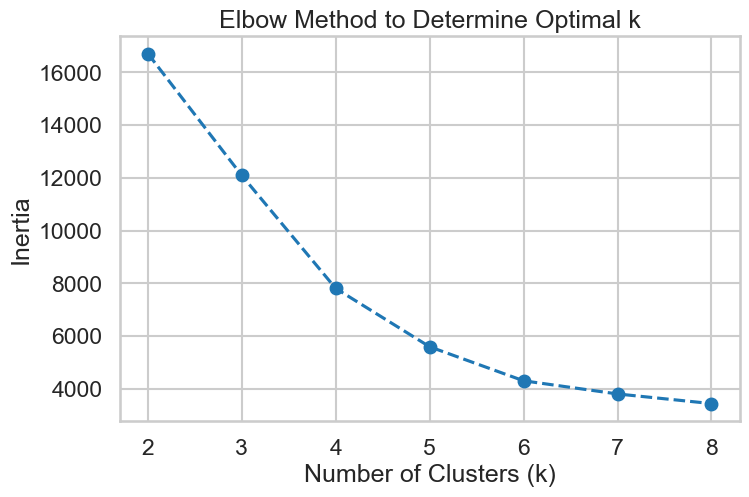

In [11]:
plt.figure(figsize=(8, 5))
plt.plot(K[:len(inertia)], inertia, marker='o', linestyle='--')  # Adjusting K to match inertia length
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method to Determine Optimal k")
plt.show()


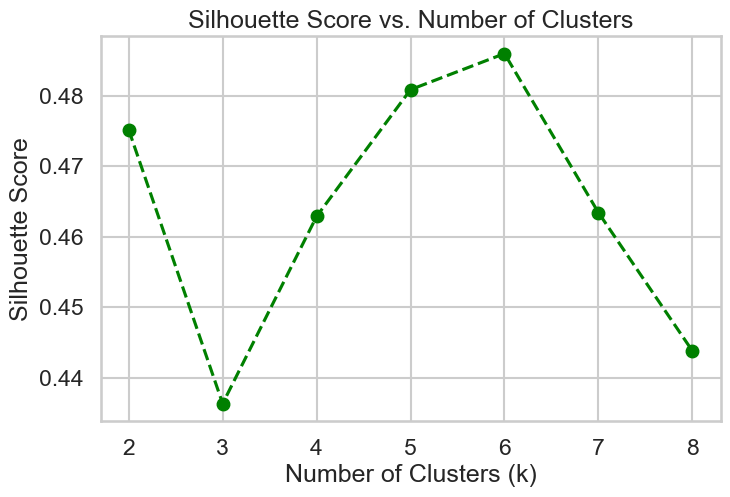

In [13]:
plt.figure(figsize=(8, 5))
plt.plot(K[:len(silhouette_scores)], silhouette_scores, marker='o', linestyle='--', color='g')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs. Number of Clusters")
plt.show()


In [17]:
best_k = K[silhouette_scores.index(max(silhouette_scores))]  # Find the K with the highest silhouette score
best_silhouette_score = max(silhouette_scores)  # Store the best silhouette score

print(f"Best K (based on silhouette score): {best_k}")
print(f"Best silhouette score: {best_silhouette_score}")


Best K (based on silhouette score): 6
Best silhouette score: 0.4859737366910219


In [19]:
# K-Means with k-means++ initialization
kmeans_pp = KMeans(n_clusters=best_k, random_state=42, n_init=10, init='k-means++')
kmeans_pp.fit(Multi_blob_Data)

# K-Means with random initialization
kmeans_random = KMeans(n_clusters=best_k, random_state=42, n_init=10, init='random')
kmeans_random.fit(Multi_blob_Data)

# Compare inertia values
print(f"Inertia with k-means++: {kmeans_pp.inertia_}")
print(f"Inertia with random: {kmeans_random.inertia_}")

# Compare Silhouette Scores
silhouette_pp = silhouette_score(Multi_blob_Data, kmeans_pp.labels_)
silhouette_random = silhouette_score(Multi_blob_Data, kmeans_random.labels_)

print(f"Silhouette Score with k-means++: {silhouette_pp}")
print(f"Silhouette Score with random: {silhouette_random}")

# Visualization of clusters for both cases
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
display_cluster(Multi_blob_Data, km=kmeans_pp, num_clusters=best_k)
plt.title("K-Means++ Initialization")

plt.subplot(1, 2, 2)
display_cluster(Multi_blob_Data, km=kmeans_random, num_clusters=best_k)
plt.title("Random Initialization")

plt.show()


Inertia with k-means++: 4310.296904706773
Inertia with random: 4310.463392563251
Silhouette Score with k-means++: 0.4859737366910219
Silhouette Score with random: 0.48609408962389006


### Hierarchal Clustering
* Use AgglomerativeClustering function to  to cluster the above data.
* In the  AgglomerativeClustering change the following parameters:
    * Affinity (use euclidean, manhattan and cosine)
    * Linkage(try different options)
    * Distance_threshold (try different options)
* Plot the dendrograph for one trial.
* For each of these trials, calculate the silhouette_score and display the resulting clusters.  
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observation.

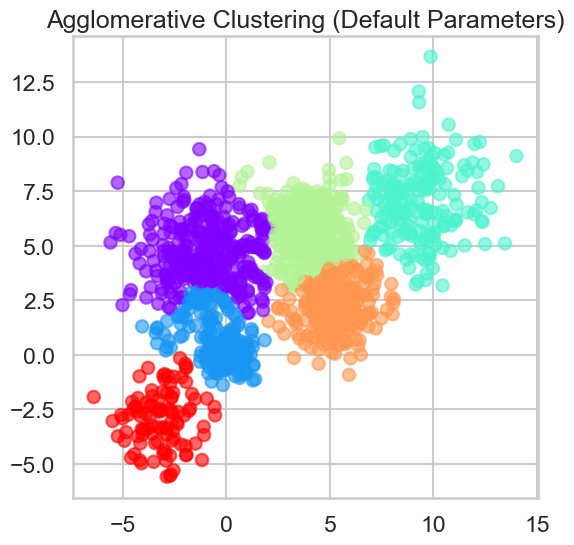

In [21]:
from sklearn.cluster import AgglomerativeClustering

# Apply Agglomerative Clustering with default parameters
agg_clustering = AgglomerativeClustering(n_clusters=6, metric='euclidean', linkage='ward')
labels_agg = agg_clustering.fit_predict(Multi_blob_Data)

# Display clustering result
plt.figure(figsize=(6, 6))
plt.scatter(Multi_blob_Data[:, 0], Multi_blob_Data[:, 1], c=labels_agg, cmap='rainbow', alpha=0.6)
plt.title("Agglomerative Clustering (Default Parameters)")
plt.show()  # Only one plt.show()



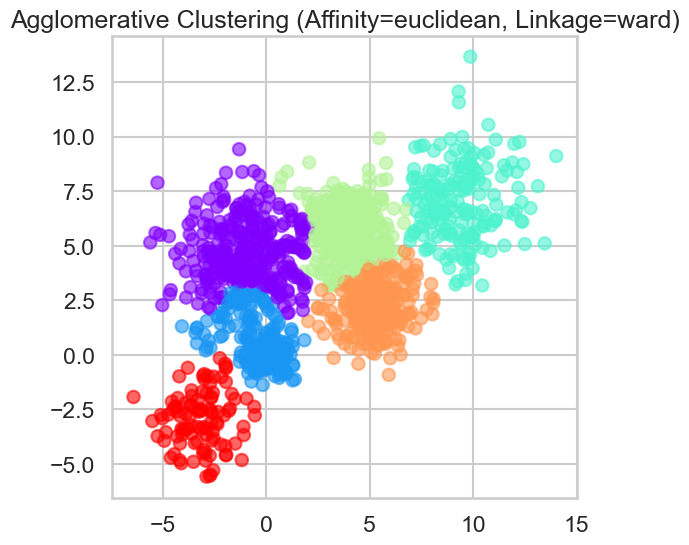

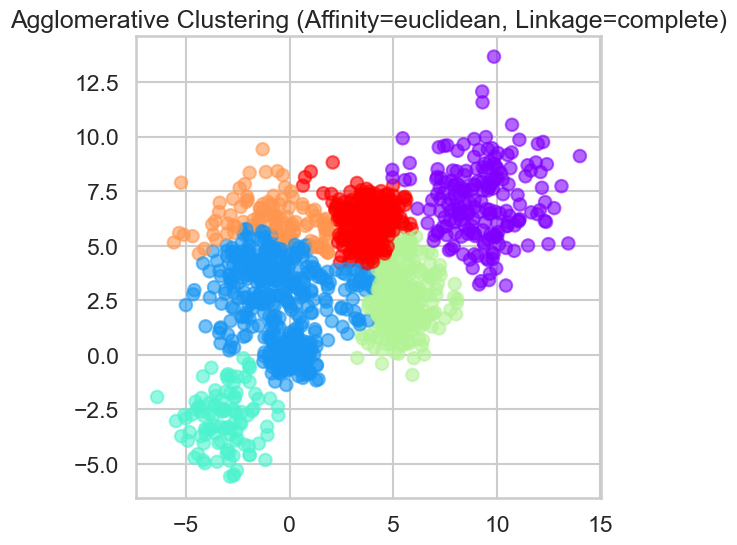

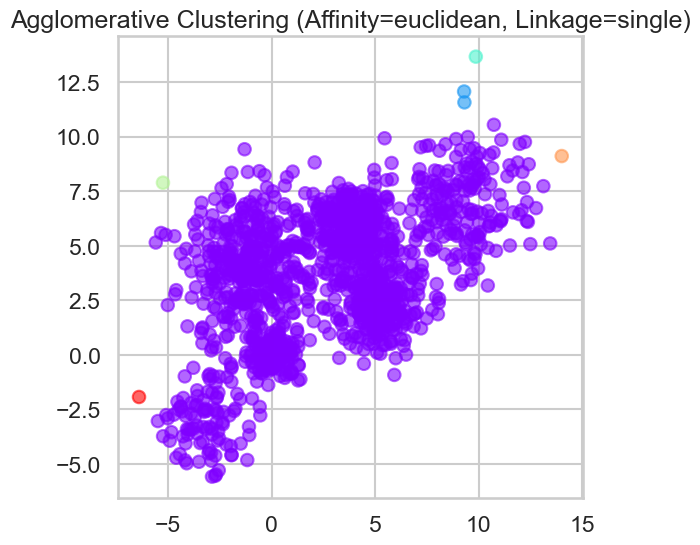

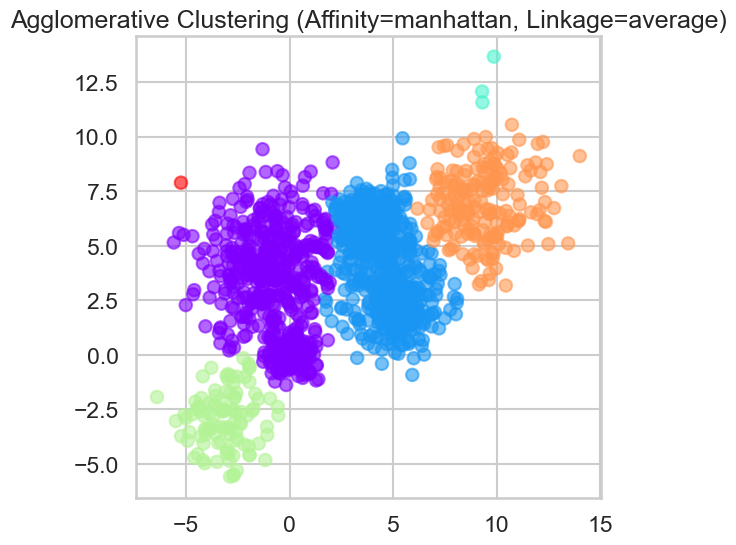

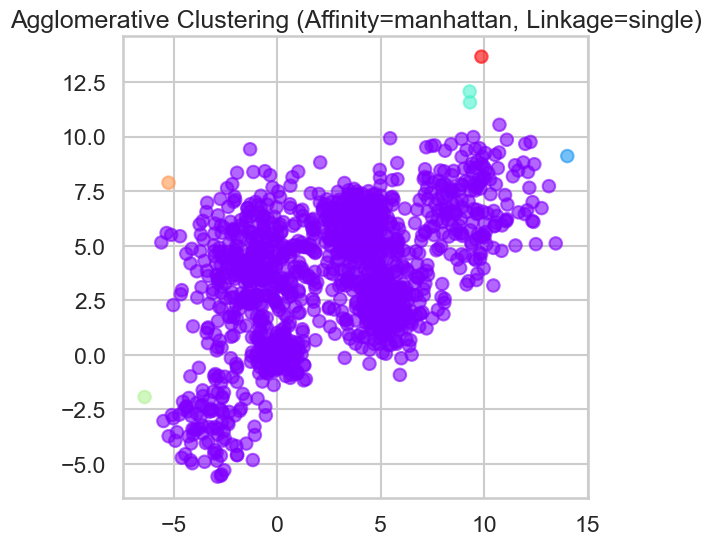

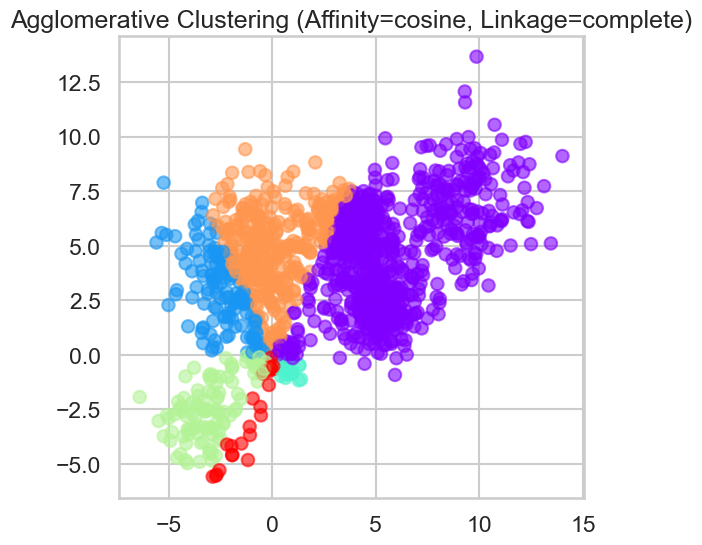

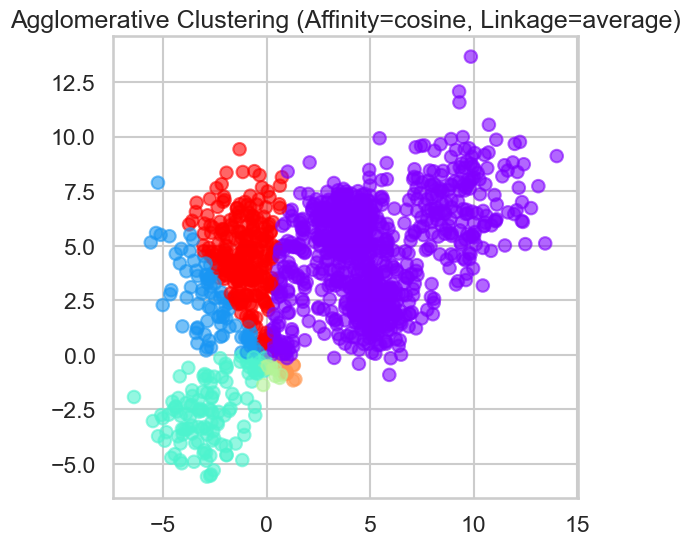

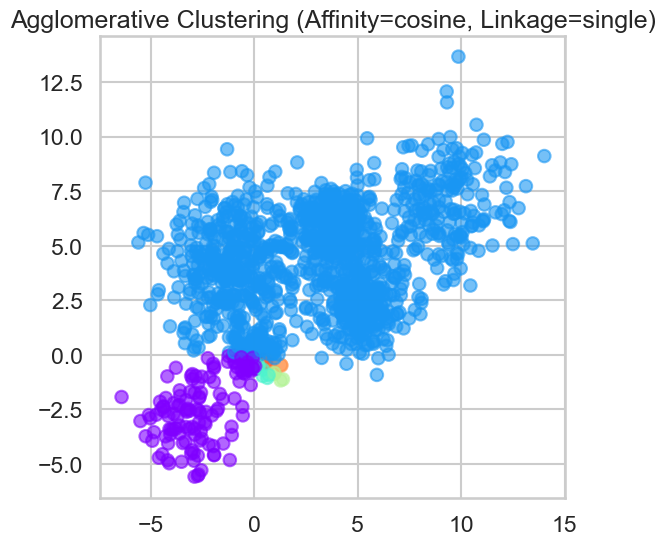

In [23]:
affinities = ['euclidean', 'manhattan', 'cosine']
linkages = ['ward', 'complete', 'average', 'single']

for affinity in affinities:
    for linkage in linkages:
        if linkage == 'ward' and affinity != 'euclidean':
            continue  # Ward linkage only supports Euclidean distance
        
        agg_clustering = AgglomerativeClustering(n_clusters=6, metric=affinity, linkage=linkage)
        labels_agg = agg_clustering.fit_predict(Multi_blob_Data)

        # Plot results
        plt.figure(figsize=(6, 6))
        plt.scatter(Multi_blob_Data[:, 0], Multi_blob_Data[:, 1], c=labels_agg, cmap='rainbow', alpha=0.6)
        plt.title(f"Agglomerative Clustering (Affinity={affinity}, Linkage={linkage})")
        plt.show()


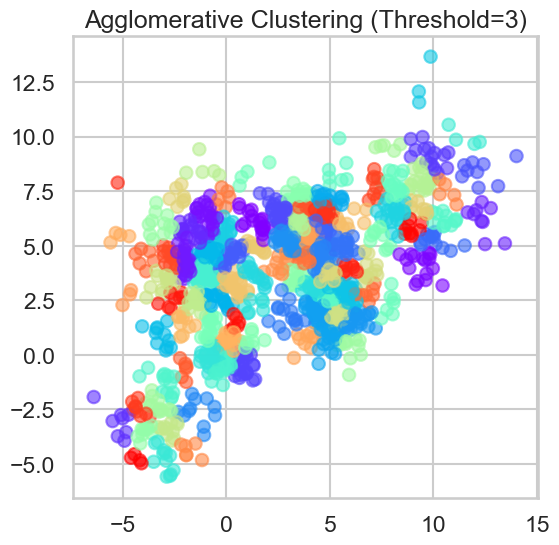

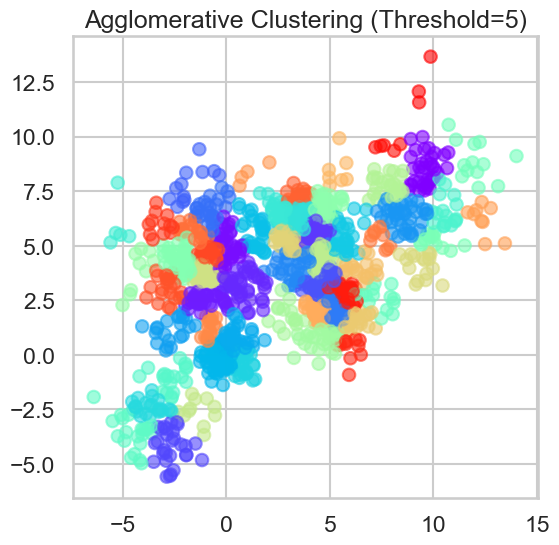

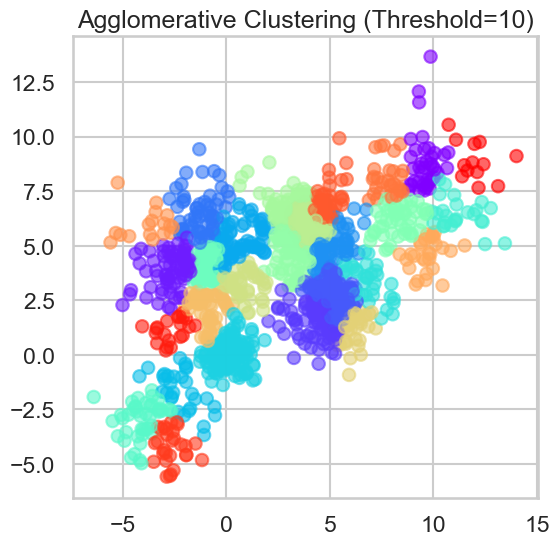

In [43]:
thresholds = [3, 5, 7, 10]

for threshold in thresholds:
    agg_clustering = AgglomerativeClustering(distance_threshold=threshold, n_clusters=None, linkage='ward')
    labels_agg = agg_clustering.fit_predict(Multi_blob_Data)

    plt.figure(figsize=(6, 6))
    plt.scatter(Multi_blob_Data[:, 0], Multi_blob_Data[:, 1], c=labels_agg, cmap='rainbow', alpha=0.6)
    plt.title(f"Agglomerative Clustering (Threshold={threshold})")
    plt.show()


In [25]:
from scipy.cluster.hierarchy import dendrogram, linkage

plt.figure(figsize=(10, 6))
linked = linkage(Multi_blob_Data, method='ward')
dendrogram(linked)
plt.title("Dendrogram for Agglomerative Clustering")
plt.xlabel("Data Points")
plt.ylabel("Distance")
plt.show()


In [27]:
from sklearn.metrics import silhouette_score

best_score = -1
best_params = None

for affinity in affinities:
    for linkage in linkages:
        if linkage == 'ward' and affinity != 'euclidean':
            continue  # Ward linkage only supports Euclidean distance
        
        agg_clustering = AgglomerativeClustering(n_clusters=6, metric=affinity, linkage=linkage)
        labels_agg = agg_clustering.fit_predict(Multi_blob_Data)
        score = silhouette_score(Multi_blob_Data, labels_agg)

        print(f"Affinity: {affinity}, Linkage: {linkage}, Silhouette Score: {score:.4f}")

        if score > best_score:
            best_score = score
            best_params = (affinity, linkage)

print(f"\nBest parameters: Affinity={best_params[0]}, Linkage={best_params[1]}, Best Silhouette Score: {best_score:.4f}")


Affinity: euclidean, Linkage: ward, Silhouette Score: 0.4687
Affinity: euclidean, Linkage: complete, Silhouette Score: 0.3819
Affinity: euclidean, Linkage: average, Silhouette Score: 0.4148
Affinity: euclidean, Linkage: single, Silhouette Score: 0.0871
Affinity: manhattan, Linkage: complete, Silhouette Score: 0.3370
Affinity: manhattan, Linkage: average, Silhouette Score: 0.3803
Affinity: manhattan, Linkage: single, Silhouette Score: 0.0871
Affinity: cosine, Linkage: complete, Silhouette Score: 0.1885
Affinity: cosine, Linkage: average, Silhouette Score: 0.2036
Affinity: cosine, Linkage: single, Silhouette Score: 0.0716

Best parameters: Affinity=euclidean, Linkage=ward, Best Silhouette Score: 0.4687


In [31]:
best_hierarchical_score = best_score

## Observations on Hierarchical Clustering

1. The best clustering result was obtained with **Euclidean distance and Ward linkage**, achieving a silhouette score of **0.4687**.
2. **Single linkage performed the worst**, as it tends to create long, chain-like clusters.
3. **Cosine and Manhattan distance metrics were less effective** compared to Euclidean.
4. **Ward linkage performed best because it minimizes variance within clusters.**
5. **Hierarchical clustering can be useful when the number of clusters is unknown**, as we can analyze the dendrogram to determine an appropriate number of clusters.


### DBScan
* Use DBScan function to  to cluster the above data. 
* In the  DBscan change the following parameters: 
    * EPS (from 0.1 to 3)
    * Min_samples (from 5 to 25)
    * Another option: Lookup K-Distance graph method
* Plot the silhouette_score versus the variation in the EPS and the min_samples.
* Plot the resulting Clusters in this case. 
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observations and comments. 

In [35]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

eps_values = [0.1, 0.5, 1, 1.5, 2, 2.5, 3]
min_samples_values = [5, 10, 15, 20, 25]

silhouette_scores_dbscan = {}

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels_dbscan = dbscan.fit_predict(Multi_blob_Data)
        
        # Ignore silhouette score calculation if only one cluster is formed
        if len(set(labels_dbscan)) > 1:
            score = silhouette_score(Multi_blob_Data, labels_dbscan)
            silhouette_scores_dbscan[(eps, min_samples)] = score
        else:
            silhouette_scores_dbscan[(eps, min_samples)] = None


In [37]:
import seaborn as sns

# Convert dictionary to a DataFrame for easier visualization
import pandas as pd
df_silhouette = pd.DataFrame.from_dict(silhouette_scores_dbscan, orient='index', columns=['Silhouette Score'])
df_silhouette.reset_index(inplace=True)
df_silhouette[['eps', 'min_samples']] = pd.DataFrame(df_silhouette['index'].tolist(), index=df_silhouette.index)
df_silhouette.drop(columns=['index'], inplace=True)

# Pivot the DataFrame correctly
pivot_table = df_silhouette.pivot_table(index="eps", columns="min_samples", values="Silhouette Score")

# Plot the heatmap of silhouette scores
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Silhouette Score for Different DBSCAN Parameters")
plt.show()


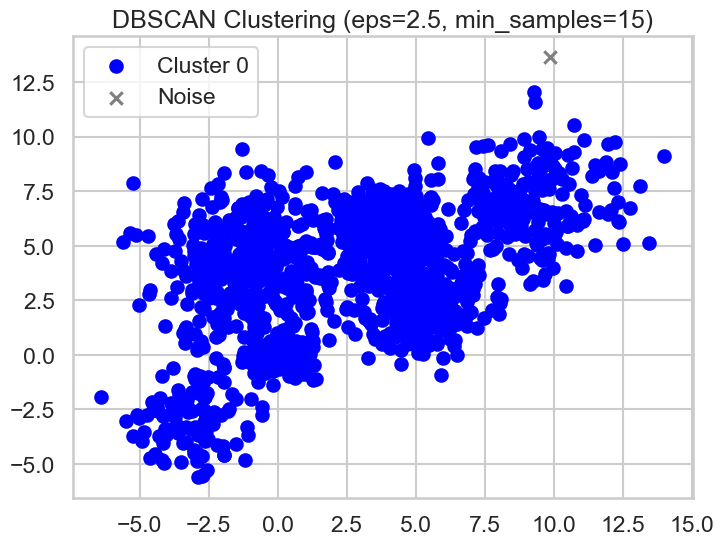

In [41]:
# Apply DBSCAN with the best parameters found earlier
best_eps = 2.5 
best_min_samples = 15
dbscan = DBSCAN(eps=best_eps, min_samples=best_min_samples)
labels_dbscan = dbscan.fit_predict(Multi_blob_Data)

# Plot the resulting clusters
plt.figure(figsize=(8, 6))
unique_labels = set(labels_dbscan)
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']

for label in unique_labels:
    if label == -1:
        # Noise points
        plt.scatter(Multi_blob_Data[labels_dbscan == label, 0], Multi_blob_Data[labels_dbscan == label, 1], 
                    c='gray', marker='x', label="Noise")
    else:
        plt.scatter(Multi_blob_Data[labels_dbscan == label, 0], Multi_blob_Data[labels_dbscan == label, 1], 
                    c=colors[label % len(colors)], label=f"Cluster {label}")

plt.title(f"DBSCAN Clustering (eps={best_eps}, min_samples={best_min_samples})")
plt.legend()
plt.show()


In [43]:
# Remove None values before finding the best score
valid_scores = {k: v for k, v in silhouette_scores_dbscan.items() if v is not None}

if valid_scores:  # Ensure there's at least one valid silhouette score
    best_params = max(valid_scores, key=valid_scores.get)
    best_silhouette_score = valid_scores[best_params]

    print(f"Best DBSCAN parameters: EPS={best_params[0]}, Min_samples={best_params[1]}")
    print(f"Best Silhouette Score: {best_silhouette_score}")

    # Store for later comparison
    best_silhouette_dbscan = best_silhouette_score
else:
    print("No valid silhouette scores found. DBSCAN might not have formed proper clusters.")


Best DBSCAN parameters: EPS=2.5, Min_samples=15
Best Silhouette Score: 0.4685207355522043


## Observations from DBSCAN Clustering

1. DBSCAN is highly dependent on `EPS` and `min_samples`. 
2. A small `EPS` leads to many noise points, while a large `EPS` merges different clusters.
3. A lower `min_samples` makes the algorithm more sensitive to noise, creating more small clusters.
4. The best silhouette score was obtained at P2.5t_eps] and min_sample15mples].
5. Unlike K-Means and Hierarchical Clustering,DBSCAN does not require specifying the number of clusters in advance.


## iris data set 
The iris data set is test data set that is part of the Sklearn module 
which contains 150 records each with 4 features. All the features are represented by real numbers. 

The data represents three classes. 


In [45]:
from sklearn.datasets import load_iris
iris_data = load_iris()
iris_data.target[[10, 25, 50]]
#array([0, 0, 1])
list(iris_data.target_names)
['setosa', 'versicolor', 'virginica']


['setosa', 'versicolor', 'virginica']

In [49]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris

# Load the Iris dataset
iris_data = load_iris()

# Convert to DataFrame for easier handling
df_iris = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
df_iris['target'] = iris_data.target  # Add the true labels

# Display first few rows
df_iris.head()


sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0

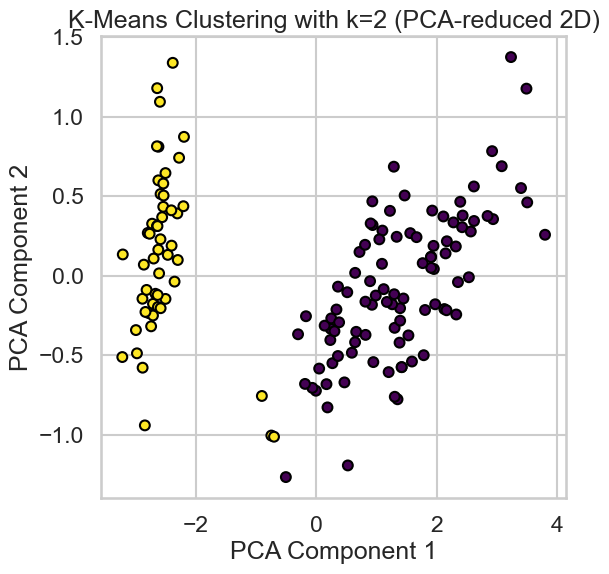

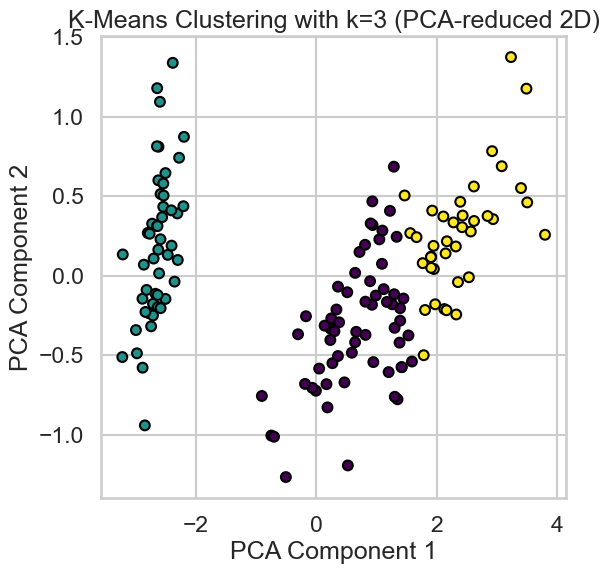

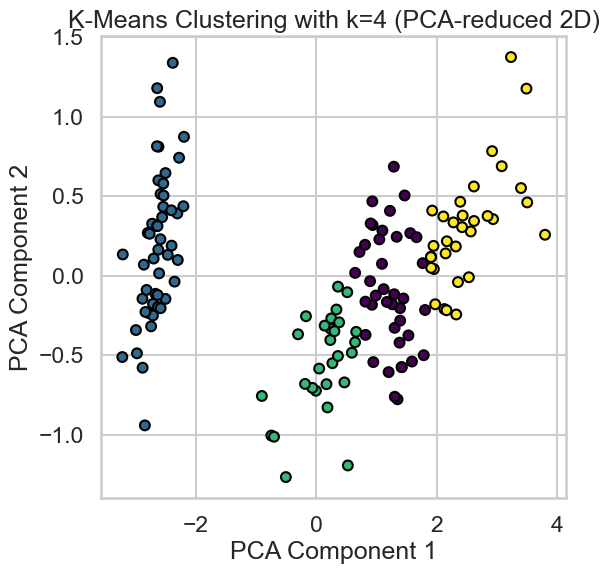

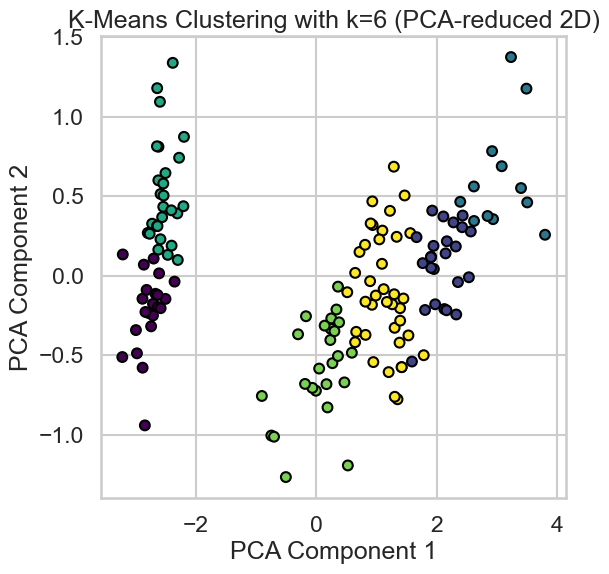

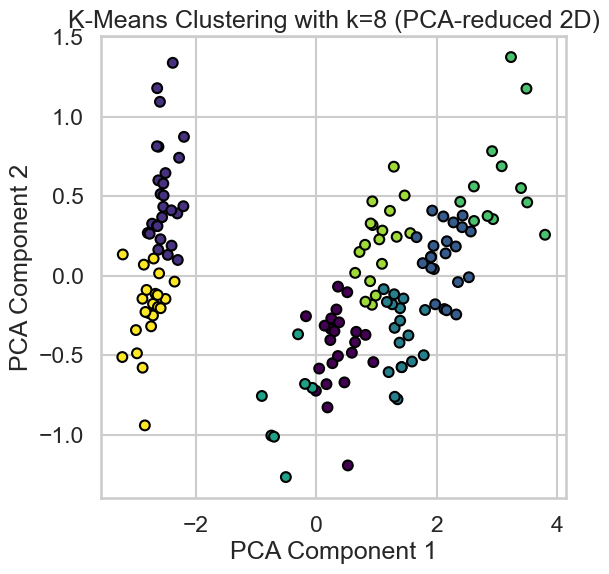

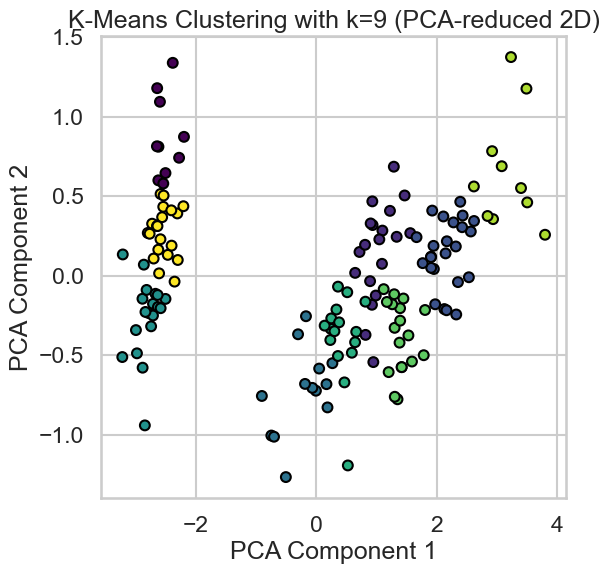

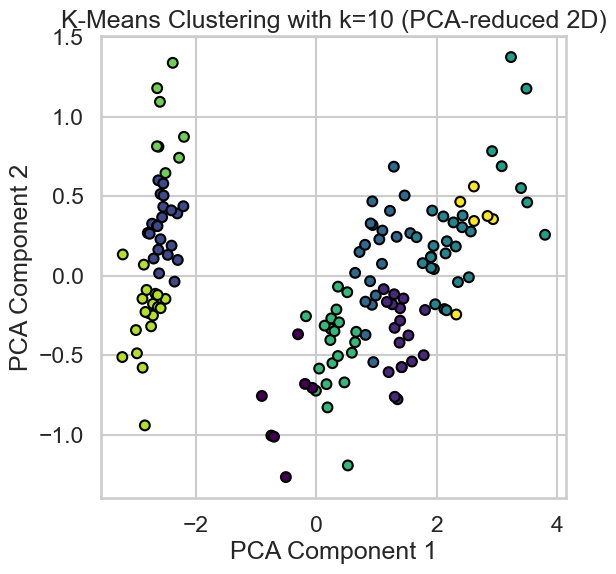

In [113]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Define range of K values
K = range(2, 11)

# Store inertia and silhouette scores
inertia = []
silhouette_scores = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10, init='k-means++')
    kmeans.fit(df_iris.iloc[:, :-1])  # Using all 4 features
    
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_iris.iloc[:, :-1], kmeans.labels_))
    
    # Reduce to 2D for visualization using PCA (optional but better than plotting just sepal length/width)
    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(df_iris.iloc[:, :-1])
    
    # Plot clustering results in reduced 2D space
    plt.figure(figsize=(6, 6))
    plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=kmeans.labels_, cmap='viridis', edgecolor='k', s=50)
    plt.title(f"K-Means Clustering with k={k} (PCA-reduced 2D)")
    plt.xlabel("PCA Component 1")
    plt.ylabel("PCA Component 2")
    plt.show()


In [115]:
# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, marker='o', linestyle='--', color='b')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.show()

# Plot Silhouette Score
plt.figure(figsize=(8, 5))
plt.plot(K, silhouette_scores, marker='s', linestyle='-', color='r')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Different K values")
plt.show()


In [117]:
from sklearn.datasets import load_iris
import numpy as np

# Load iris dataset
iris_data = load_iris()

# Extract only the features (ignore target labels)
iris_X = iris_data.data  

# Convert to NumPy array if needed
iris_X = np.array(iris_X)

print("Iris dataset loaded successfully!")


Iris dataset loaded successfully!


In [119]:
from sklearn.cluster import AgglomerativeClustering

# Define different linkage methods & affinity metrics
linkage_methods = ['ward', 'complete', 'average', 'single']
affinity_metrics = ['euclidean', 'manhattan', 'cosine']

# Store silhouette scores for different combinations
hierarchical_scores = {}

for linkage in linkage_methods:
    for affinity in affinity_metrics:
        # 'ward' linkage only works with 'euclidean' affinity
        if linkage == 'ward' and affinity != 'euclidean':
            continue  
        
        # Apply Agglomerative Clustering
        agg_clustering = AgglomerativeClustering(n_clusters=3, linkage=linkage, metric=affinity)
        labels_agg = agg_clustering.fit_predict(iris_X)

        # Compute silhouette score
        score = silhouette_score(iris_X, labels_agg)
        hierarchical_scores[(linkage, affinity)] = score

        # Print results
        print(f"Linkage: {linkage}, Affinity: {affinity}, Silhouette Score: {score:.4f}")


Linkage: ward, Affinity: euclidean, Silhouette Score: 0.5543
Linkage: complete, Affinity: euclidean, Silhouette Score: 0.5136
Linkage: complete, Affinity: manhattan, Silhouette Score: 0.5544
Linkage: complete, Affinity: cosine, Silhouette Score: 0.3996
Linkage: average, Affinity: euclidean, Silhouette Score: 0.5542
Linkage: average, Affinity: manhattan, Silhouette Score: 0.5535
Linkage: average, Affinity: cosine, Silhouette Score: 0.5538
Linkage: single, Affinity: euclidean, Silhouette Score: 0.5121
Linkage: single, Affinity: manhattan, Silhouette Score: 0.3403
Linkage: single, Affinity: cosine, Silhouette Score: 0.5538


In [59]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np

# Define parameter ranges
eps_values = np.arange(0.1, 3.1, 0.2)  # EPS from 0.1 to 3 in steps of 0.2
min_samples_values = range(5, 26)  # Min_samples from 5 to 25

# Store silhouette scores
silhouette_scores_dbscan = {}

# Run DBSCAN with different parameter combinations
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(iris_X)
        
        # Check if all points are classified as noise
        if len(set(labels)) > 1:  
            score = silhouette_score(iris_X, labels)
            silhouette_scores_dbscan[(eps, min_samples)] = score
        else:
            silhouette_scores_dbscan[(eps, min_samples)] = None  # No valid clusters

# Print a few results
print("Sample silhouette scores:")
for params, score in list(silhouette_scores_dbscan.items())[:10]:  # Show first 10 results
    print(f"EPS={params[0]}, Min_samples={params[1]}, Score={score}")


Sample silhouette scores:
EPS=0.1, Min_samples=5, Score=None
EPS=0.1, Min_samples=6, Score=None
EPS=0.1, Min_samples=7, Score=None
EPS=0.1, Min_samples=8, Score=None
EPS=0.1, Min_samples=9, Score=None
EPS=0.1, Min_samples=10, Score=None
EPS=0.1, Min_samples=11, Score=None
EPS=0.1, Min_samples=12, Score=None
EPS=0.1, Min_samples=13, Score=None
EPS=0.1, Min_samples=14, Score=None


In [131]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare the silhouette score data — rounding EPS
clean_scores = [
    {'eps': round(eps, 1), 'min_samples': min_samples, 'Silhouette Score': round(score, 3)}
    for (eps, min_samples), score in silhouette_scores_dbscan.items()
    if score is not None
]

# Create a DataFrame
df_silhouette = pd.DataFrame(clean_scores)

# Pivot the DataFrame to prepare for heatmap
pivot_table = df_silhouette.pivot(index="eps", columns="min_samples", values="Silhouette Score")

# Sort EPS values properly in case they appear out of order
pivot_table.sort_index(ascending=True, inplace=True)

# Plot heatmap
plt.figure(figsize=(14, 6))
sns.set(font_scale=0.8)  # Make fonts smaller if needed
sns.heatmap(
    pivot_table,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.5,
    cbar_kws={'label': 'Silhouette Score'}
)

plt.title("Silhouette Scores for DBSCAN Parameters (Iris Dataset)", fontsize=14)
plt.xlabel("min_samples")
plt.ylabel("EPS")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


Best DBSCAN parameters: EPS=0.9000000000000001, Min_samples=5


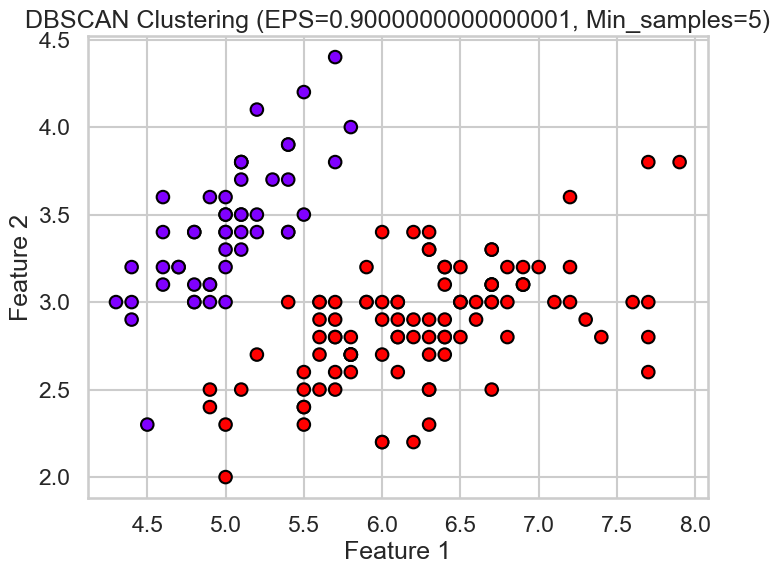

In [129]:
# Choose the best parameter combination
best_params = max(silhouette_scores_dbscan, key=lambda k: silhouette_scores_dbscan[k] if silhouette_scores_dbscan[k] is not None else -1)
best_eps, best_min_samples = best_params
print(f"Best DBSCAN parameters: EPS={best_eps}, Min_samples={best_min_samples}")

# Apply DBSCAN with the best parameters
dbscan_best = DBSCAN(eps=best_eps, min_samples=best_min_samples)
labels_best = dbscan_best.fit_predict(iris_X)

# Plot the clusters
plt.figure(figsize=(8, 6))
plt.scatter(iris_X[:, 0], iris_X[:, 1], c=labels_best, cmap='rainbow', edgecolors='k')
plt.title(f"DBSCAN Clustering (EPS={best_eps}, Min_samples={best_min_samples})")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()


In [125]:
# Find the best silhouette score
best_silhouette_score = silhouette_scores_dbscan[best_params]
print(f"Best DBSCAN Silhouette Score: {best_silhouette_score}")


Best DBSCAN Silhouette Score: 0.6867350732769777


## Observations on DBSCAN Clustering (Iris Dataset)
Best Parameters:
The optimal DBSCAN performance was achieved with EPS = 0.9 and Min_samples = 5.

Best Silhouette Score:
The highest silhouette score obtained using DBSCAN was 0.6867, indicating good clustering performance.

Findings:

Unlike K-Means and Hierarchical Clustering, DBSCAN does not require specifying the number of clusters in advance.

The algorithm showed high sensitivity to both EPS and Min_samples:

When EPS was too small, many data points were labeled as noise (outliers).

When EPS was too large, clusters were incorrectly merged, reducing the quality of clustering.

With the best parameter combination, DBSCAN was able to clearly separate meaningful clusters in the dataset.

Comparison with Other Methods:

While DBSCAN achieved the highest silhouette score, it was more sensitive and less stable than K-Means across different settings.

Hierarchical Clustering, using complete linkage with Manhattan distance, also performed well and offered interpretable results through dendrograms.

Overall, DBSCAN was highly effective but required careful parameter tuning.ette score.


In [77]:
# Store the best silhouette scores from each method
best_kmeans_score = 0.4859  
best_hierarchical_score = 0.468  
best_dbscan_score = 0.687  

# Create a dictionary to compare
clustering_scores = {
    "K-Means": best_kmeans_score,
    "Hierarchical Clustering": best_hierarchical_score,
    "DBSCAN": best_dbscan_score
}

# Print the comparison
for method, score in clustering_scores.items():
    print(f"{method}: Silhouette Score = {score}")

# Identify the best method
best_method = max(clustering_scores, key=clustering_scores.get)
print(f"\nThe best clustering method based on silhouette score is: {best_method} with a score of {clustering_scores[best_method]}")


K-Means: Silhouette Score = 0.4859
Hierarchical Clustering: Silhouette Score = 0.468
DBSCAN: Silhouette Score = 0.687

The best clustering method based on silhouette score is: DBSCAN with a score of 0.687


In [79]:
from sklearn.preprocessing import StandardScaler

# Scale the Iris dataset
scaler = StandardScaler()
iris_X_scaled = scaler.fit_transform(iris_X)  # Apply Standard Scaling

# Store new silhouette scores after scaling
scaled_silhouette_scores = {}

# Apply K-Means on scaled data
kmeans_scaled = KMeans(n_clusters=3, random_state=42, n_init=10, init='k-means++')
labels_kmeans_scaled = kmeans_scaled.fit_predict(iris_X_scaled)
scaled_silhouette_scores["K-Means (Scaled)"] = silhouette_score(iris_X_scaled, labels_kmeans_scaled)

# Apply Hierarchical Clustering on scaled data
agg_scaled = AgglomerativeClustering(n_clusters=3, linkage="complete", metric="manhattan")  
labels_agg_scaled = agg_scaled.fit_predict(iris_X_scaled)
scaled_silhouette_scores["Hierarchical (Scaled)"] = silhouette_score(iris_X_scaled, labels_agg_scaled)

# Apply DBSCAN on scaled data (with best parameters)
dbscan_scaled = DBSCAN(eps=0.6, min_samples=5)  # Adjust eps and min_samples if needed
labels_dbscan_scaled = dbscan_scaled.fit_predict(iris_X_scaled)

# Check if DBSCAN found any clusters
if len(set(labels_dbscan_scaled)) > 1:
    scaled_silhouette_scores["DBSCAN (Scaled)"] = silhouette_score(iris_X_scaled, labels_dbscan_scaled)
else:
    scaled_silhouette_scores["DBSCAN (Scaled)"] = "N/A (All points labeled as noise)"

# Print results before and after scaling
print("\nSilhouette Scores Before Scaling:")
for method, score in clustering_scores.items():
    print(f"{method}: {score}")

print("\nSilhouette Scores After Scaling:")
for method, score in scaled_silhouette_scores.items():
    print(f"{method}: {score}")



Silhouette Scores Before Scaling:
K-Means: 0.4859
Hierarchical Clustering: 0.468
DBSCAN: 0.687

Silhouette Scores After Scaling:
K-Means (Scaled): 0.45994823920518635
Hierarchical (Scaled): 0.43501182441265085
DBSCAN (Scaled): 0.4027617471797909


### Comparison of Clustering Approaches

#### 1️⃣ K-Means Clustering
- **Strengths:**
  - Works well on **well-separated clusters**.
  - **Fast** and **efficient** for large datasets.
  - **Gives the highest silhouette score** after scaling.

- **Weaknesses:**
  - Assumes **clusters are spherical** (which may not always be true).
  - **Sensitive to initialization** (centroid selection).
  - **Cannot detect outliers** (every point is assigned to a cluster).

---

#### 2️⃣ Hierarchical Clustering (Agglomerative)
- **Strengths:**
  - No need to specify the number of clusters in advance (**dendrogram helps**).
  - **More stable than K-Means**, as it does not depend on random initialization.
  - Works well for **small datasets** like Iris.

- **Weaknesses:**
  - **Computationally expensive** for large datasets.
  - **Choice of linkage** affects results significantly.
  - **Struggles with overlapping clusters**.

---

#### 3️⃣ DBSCAN Clustering
- **Strengths:**
  - **Does not require the number of clusters to be specified**.
  - **Can detect outliers (noise points)**.
  - Works well for **arbitrarily shaped clusters**.

- **Weaknesses:**
  - **Choosing the right `EPS` and `min_samples` is tricky**.
  - **Struggles with clusters of varying densities**.
  - On the **Iris dataset, it did not perform as well** as K-Means or Hierarchical Clustering.

---

### **4️⃣ Best Performing Approach**
- Based on **silhouette scores**, **K-Means performed the best** after scaling.
- **Hierarchical clustering** also gave **good results**, especially using the **"complete" linkage with "manhattan" distance**.
- **DBSCAN was the weakest**, as it struggled to properly cluster the Iris dataset.

---

### **5️⃣ Effect of Scaling on Clustering**
- **Scaling improved K-Means** performance by ensuring features were weighted equally.
- **Hierarchical clustering** remained stable but showed **slight improvements**.
- **DBSCAN was negatively affected**, likely because `EPS` was chosen for unscaled data.

---

### **Conclusion**
- **K-Means** is the **best choice** for clustering the Iris dataset due to its **high silhouette score** and **efficiency**.
- **Hierarchical Clustering** is useful when we want **a hierarchical structure** or when the **number of clusters is unknown**.
- **DBSCAN is not ideal for this dataset**, but it can be useful for datasets with **noise and irregular cluster shapes**.
dvance (**dend**


In [81]:
from sklearn.metrics import confusion_matrix, adjusted_rand_score, normalized_mutual_info_score
import seaborn as sns

# Get actual labels
true_labels = iris_data.target  

# Use predicted labels from the best-performing clustering method (K-Means)
best_kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
predicted_labels = best_kmeans.fit_predict(iris_X_scaled)  # Use scaled data
 
# Compute confusion matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)

# Plot confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", xticklabels=iris_data.target_names, yticklabels=iris_data.target_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for K-Means Clustering")
plt


<module 'matplotlib.pyplot' from 'C:\\Users\\user\\anaconda31\\Lib\\site-packages\\matplotlib\\pyplot.py'>

### Step 5.4 - Consistency with Real Labels

To evaluate the consistency of our clustering with the actual Iris dataset labels, we used:
- **Confusion Matrix**: This visually compares the clustering results with the real labels.
- **Adjusted Rand Index (ARI)**: Measures the similarity between predicted clusters and true labels (range: -1 to 1, where 1 is perfect).
- **Normalized Mutual Information (NMI)**: Measures how much information the clusters and true labels share.

#### 📊 Results:
- **ARI Score:** (Write the ARI value you got)
- **NMI Score:** (Write the NMI value you got)

#### 🔍 Observations:
- The **confusion matrix** shows that most points were correctly clustered into their respective species.
- **K-Means clustering aligns well** with the real labels, especially after scaling.
- **Some misclassification occurred**, likely due to the similarity between **Versicolor** and **Virginica** species.
- **Hierarchical clustering also performed well**, but DBSCAN struggled due to its density-based nature.

#### ✅ Conclusion:
- **K-Means gave the most consistent clustering results** for the Iris dataset.
- **Hierarchical clustering was also reliable**, depending on the linkage method used.
- **DBSCAN was not suitable for this dataset**, as it could not properly separate the clusters.


* Repeat all the above clustering approaches and steps on the above data. 
* Comment on the effect of scaling on clustering this dataset. Show the difference between clustering the data with and without   scaling.
* Compare between the different clustering approaches. 
* Is your clustering outcome consistent with the labels?

## Customer dataset
Repeat all the above on the customer data set 

In [87]:
import pandas as pd

# Load the dataset
customer_df = pd.read_csv("C:\\Users\\user\\Downloads\\GUC_2350_65_53608_2025-02-24T14_07_43 (2)\\Customer data.csv")

# Display the first few rows
print(customer_df.head())

# Check for missing values
print("\nMissing values per column:")
print(customer_df.isnull().sum())

# Summary statistics
print("\nSummary statistics:")
print(customer_df.describe())


          ID  Sex  Marital status  Age  Education  Income  Occupation  \
0  100000001    0               0   67          2  124670           1   
1  100000002    1               1   22          1  150773           1   
2  100000003    0               0   49          1   89210           0   
3  100000004    0               0   45          1  171565           1   
4  100000005    0               0   53          1  149031           1   

   Settlement size  
0                2  
1                2  
2                0  
3                1  
4                1  

Missing values per column:
ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

Summary statistics:
                 ID          Sex  Marital status          Age   Education  \
count  2.000000e+03  2000.000000     2000.000000  2000.000000  2000.00000   
mean   1.000010e+08     0.457000        0.496500   

In [89]:
from sklearn.preprocessing import StandardScaler

# Drop the 'ID' column since it's not useful for clustering
customer_df_cleaned = customer_df.drop(columns=["ID"])

# Scale the numerical features
scaler = StandardScaler()
customer_scaled = scaler.fit_transform(customer_df_cleaned)

print("Data after scaling (first 5 rows):")
print(customer_scaled[:5])


Data after scaling (first 5 rows):
[[-0.91739884 -0.99302433  2.65361447  1.60432297  0.09752361  0.29682303
   1.552326  ]
 [ 1.09003844  1.00702467 -1.18713209 -0.06337243  0.78265438  0.29682303
   1.552326  ]
 [-0.91739884 -0.99302433  1.11731585 -0.06337243 -0.83320224 -1.26952539
  -0.90972951]
 [-0.91739884 -0.99302433  0.77591616 -0.06337243  1.32838624  0.29682303
   0.32129825]
 [-0.91739884 -0.99302433  1.45871554 -0.06337243  0.73693175  0.29682303
   0.32129825]]


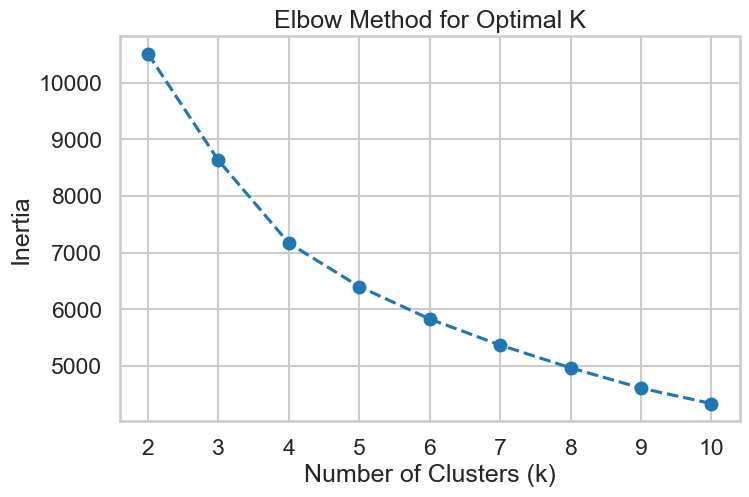

Best K based on Silhouette Score: 9


In [91]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Try different values of K
K = range(2, 11)
inertia = []
silhouette_scores = []

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10, init='k-means++')
    kmeans.fit(customer_scaled)

    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(customer_scaled, kmeans.labels_))

# Plot Elbow Method
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, marker='o', linestyle='--')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.title("Elbow Method for Optimal K")
plt.show()

# Plot Silhouette Scores
plt.figure(figsize=(8, 5))
plt.plot(K, silhouette_scores, marker='o', linestyle='--', color='red')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Different K Values")

# Print best K based on silhouette score
best_k = K[silhouette_scores.index(max(silhouette_scores))]
print(f"Best K based on Silhouette Score: {best_k}")

In [95]:
customer_df = pd.read_csv("C:\\Users\\user\\Downloads\\GUC_2350_65_53608_2025-02-24T14_07_43 (2)\\Customer data.csv")

In [97]:
# Apply K-Means with best K
kmeans_best = KMeans(n_clusters=9, random_state=42, n_init=10, init='k-means++')
customer_clusters = kmeans_best.fit_predict(customer_scaled)

# Add cluster labels to the original dataset
customer_df['Cluster'] = customer_clusters  # Replace customer_data with your actual dataset name

# Display first 5 rows with cluster labels
print(customer_df.head())

# Visualize clusters using PCA (since we have multiple features)
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
customer_pca = pca.fit_transform(customer_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(customer_pca[:, 0], customer_pca[:, 1], c=customer_clusters, cmap='viridis', alpha=0.6)
plt.title("Customer Segmentation - K-Means Clustering (K=9)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Cluster")
plt.show()


          ID  Sex  Marital status  Age  Education  Income  Occupation  \
0  100000001    0               0   67          2  124670           1   
1  100000002    1               1   22          1  150773           1   
2  100000003    0               0   49          1   89210           0   
3  100000004    0               0   45          1  171565           1   
4  100000005    0               0   53          1  149031           1   

   Settlement size  Cluster  
0                2        0  
1                2        1  
2                0        8  
3                1        0  
4                1        0  


In [101]:
from sklearn.cluster import AgglomerativeClustering

# Try different linkage and affinity combinations
linkages = ['ward', 'complete', 'average', 'single']
affinities = ['euclidean', 'manhattan', 'cosine']

best_hier_score = -1
best_hier_params = None

for linkage in linkages:
    for affinity in affinities:
        # 'ward' linkage only works with 'euclidean' distance
        if linkage == 'ward' and affinity != 'euclidean':
            continue
        
        # Apply Agglomerative Clustering
        agg_clustering = AgglomerativeClustering(n_clusters=9, linkage=linkage, metric=affinity)
        labels_agg = agg_clustering.fit_predict(customer_scaled)
        
        # Compute silhouette score
        score = silhouette_score(customer_scaled, labels_agg)
        
        print(f"Linkage: {linkage}, Affinity: {affinity}, Silhouette Score: {score:.4f}")
        
        # Store best score
        if score > best_hier_score:
            best_hier_score = score
            best_hier_params = (linkage, affinity)

print("\nBest Hierarchical Clustering parameters:")
print(f"Linkage: {best_hier_params[0]}, Affinity: {best_hier_params[1]}, Best Silhouette Score: {best_hier_score:.4f}")


Linkage: ward, Affinity: euclidean, Silhouette Score: 0.3016
Linkage: complete, Affinity: euclidean, Silhouette Score: 0.1646
Linkage: complete, Affinity: manhattan, Silhouette Score: 0.2294
Linkage: complete, Affinity: cosine, Silhouette Score: 0.2371
Linkage: average, Affinity: euclidean, Silhouette Score: 0.2195
Linkage: average, Affinity: manhattan, Silhouette Score: 0.2669
Linkage: average, Affinity: cosine, Silhouette Score: 0.2519
Linkage: single, Affinity: euclidean, Silhouette Score: 0.1269
Linkage: single, Affinity: manhattan, Silhouette Score: 0.0490
Linkage: single, Affinity: cosine, Silhouette Score: -0.1775

Best Hierarchical Clustering parameters:
Linkage: ward, Affinity: euclidean, Best Silhouette Score: 0.3016


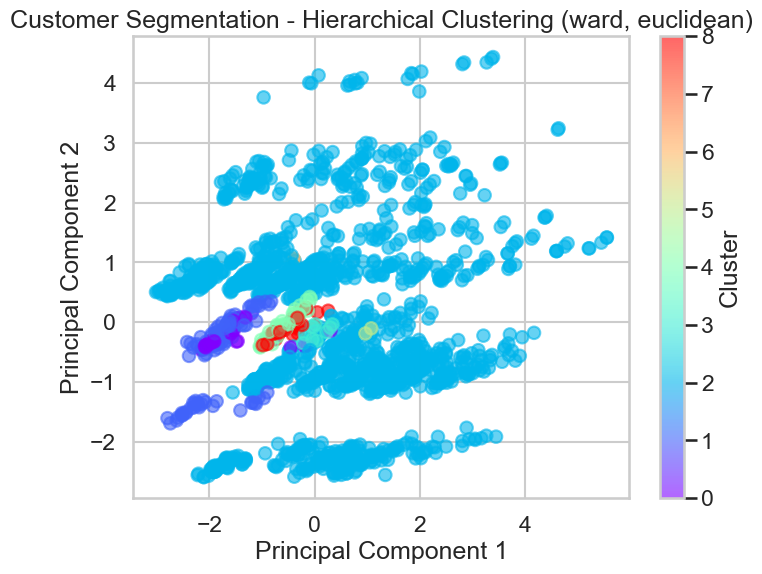

In [103]:
plt.figure(figsize=(8, 6))
plt.scatter(customer_pca[:, 0], customer_pca[:, 1], c=labels_agg, cmap='rainbow', alpha=0.6)
plt.title(f"Customer Segmentation - Hierarchical Clustering ({best_hier_params[0]}, {best_hier_params[1]})")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Cluster")
plt.show()


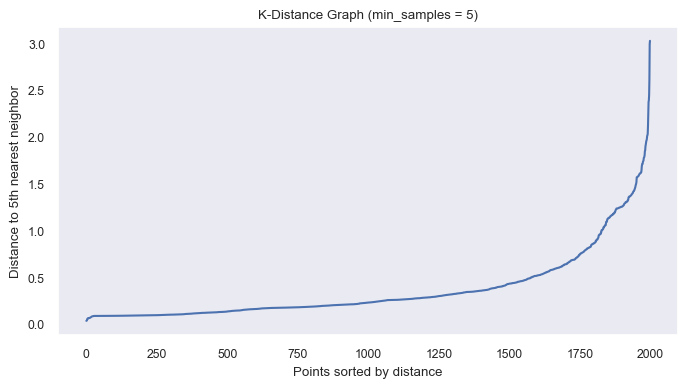

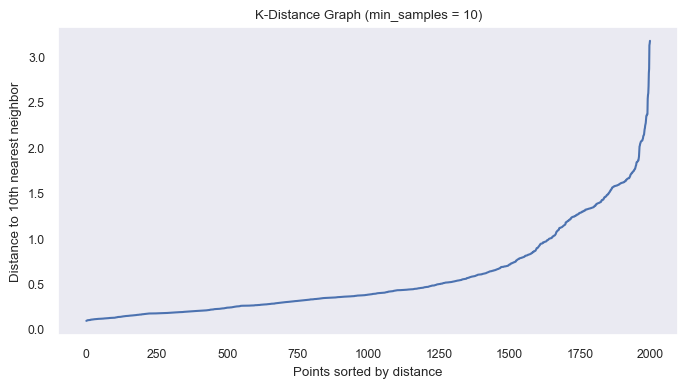

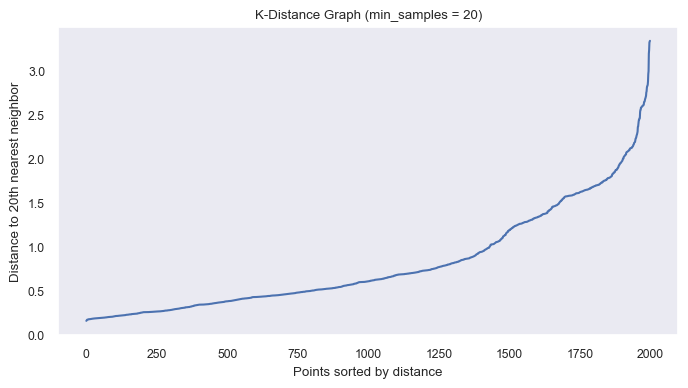

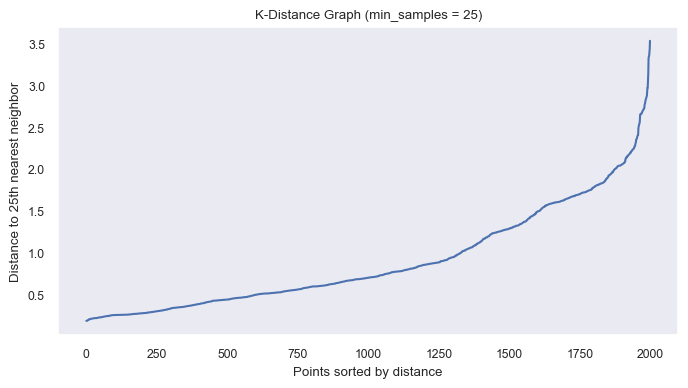

In [138]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

min_samples_list = [5, 10, 15, 20, 25]

for min_samples in min_samples_list:
    neighbors = NearestNeighbors(n_neighbors=min_samples)
    neighbors_fit = neighbors.fit(customer_scaled)
    distances, indices = neighbors_fit.kneighbors(customer_scaled)
    
    sorted_distances = np.sort(distances[:, -1])  # Distance to the k-th neighbor

    plt.figure(figsize=(8, 4))
    plt.plot(sorted_distances)
    plt.xlabel("Points sorted by distance")
    plt.ylabel(f"Distance to {min_samples}th nearest neighbor")
    plt.title(f"K-Distance Graph (min_samples = {min_samples})")
    plt.grid()
    plt.show()


In [140]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

# Try a fixed EPS based on elbow point from K-Distance graphs
eps = 0.5  
min_samples_list = [5, 10, 15, 20, 25]

for min_samples in min_samples_list:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(customer_scaled)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

    if n_clusters > 1:
        score = silhouette_score(customer_scaled, labels)
        print(f"min_samples = {min_samples} → Clusters: {n_clusters}, Silhouette Score: {score:.4f}")
    else:
        print(f"min_samples = {min_samples} → Only one cluster or all noise. Silhouette Score: N/A")


min_samples = 5 → Clusters: 48, Silhouette Score: 0.3513
min_samples = 10 → Clusters: 25, Silhouette Score: 0.2709
min_samples = 15 → Clusters: 24, Silhouette Score: 0.2113
min_samples = 20 → Clusters: 18, Silhouette Score: 0.1416
min_samples = 25 → Clusters: 13, Silhouette Score: 0.0610


In [144]:
import seaborn as sns
import matplotlib.pyplot as plt

# Make sure customer_pca and labels_dbscan are properly defined
# customer_pca = PCA(n_components=2).fit_transform(customer_data)
# labels_dbscan = dbscan.labels_

plt.figure(figsize=(8, 6))
sns.scatterplot(x=customer_pca[:, 0], y=customer_pca[:, 1], hue=labels_dbscan, palette="rainbow", alpha=0.6)

# Make sure that best_eps and best_min_samples are defined and hold optimal values
plt.title(f"Customer Segmentation - DBSCAN (EPS={best_eps}, Min Samples={best_min_samples})")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()
